In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2
from PIL import Image
import pylab

# Add the path to the src folder to the python path
sys.path.append(os.path.abspath("../src"))
from optimizer import (
    FistaBT,
    FistaMod,
    FistaCD,
    GreedyFISTA,
    RestartingFISTA,
    OptimizationParams,
)

from problems import lasso_problem

import visualization as vis

In [35]:
dim = 2  # Dimension of the problem
mu = 5  # Regularization parameter
gamma = 0.0001  # Step size
x0 = np.random.randn(dim)  # Initial point

params = OptimizationParams(
    dim=dim,
    mu=mu,
    gamma=gamma,
    x0=x0,
    verbose=False,
)
print(x0)

[ 1.97038576 -1.05994188]


In [36]:
lasso = lasso_problem(dim=dim)

# FISTA-BT


In [37]:
fista_bt = FistaBT(params)

In [38]:
x, history = fista_bt.optimize(*lasso)
print(f"Optimal point: {x}")

 23%|██▎       | 1161/5000 [00:00<00:00, 42321.42it/s]

Optimal point: [-0.18319899 -0.73727149]


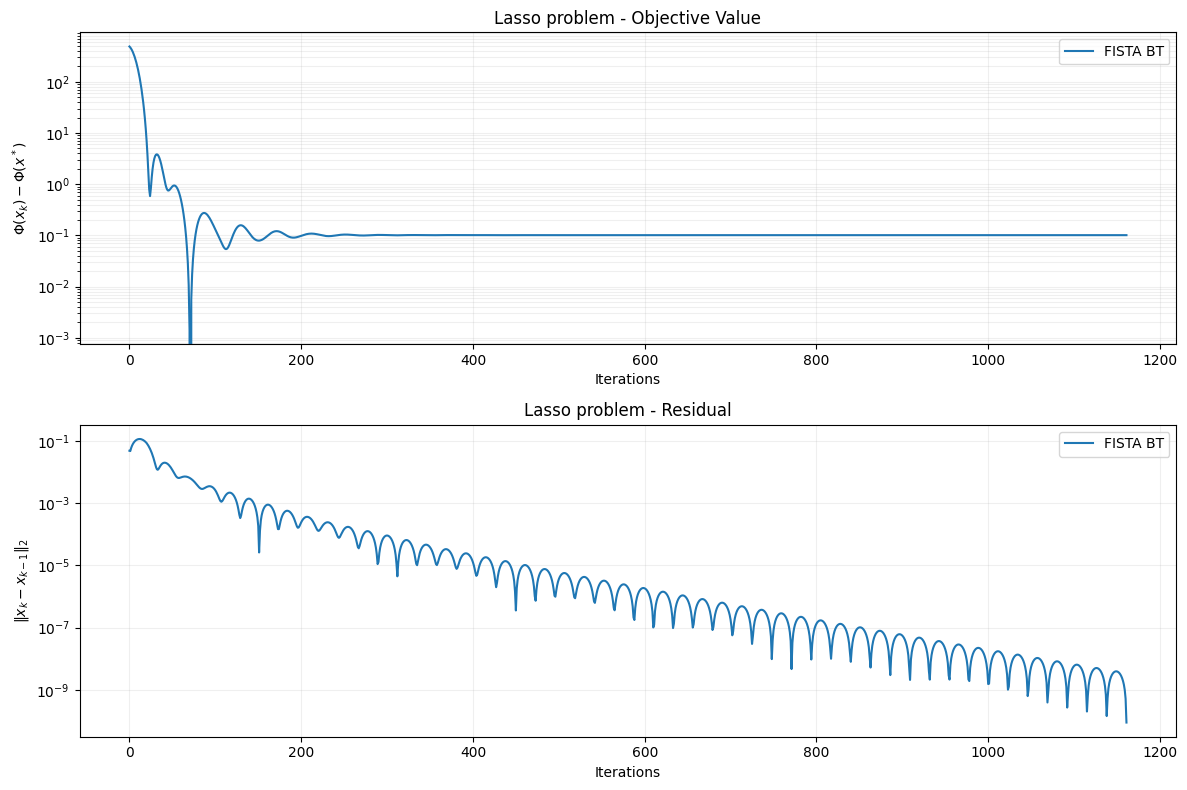

In [39]:
vis.plot_convergence([history], labels=["FISTA BT"], title="Lasso problem")

# FISTA-Mod


In [40]:
fista_mod = FistaMod(params)

In [41]:
x, history = fista_mod.optimize(*lasso)

  5%|▍         | 240/5000 [00:00<00:00, 37414.35it/s]


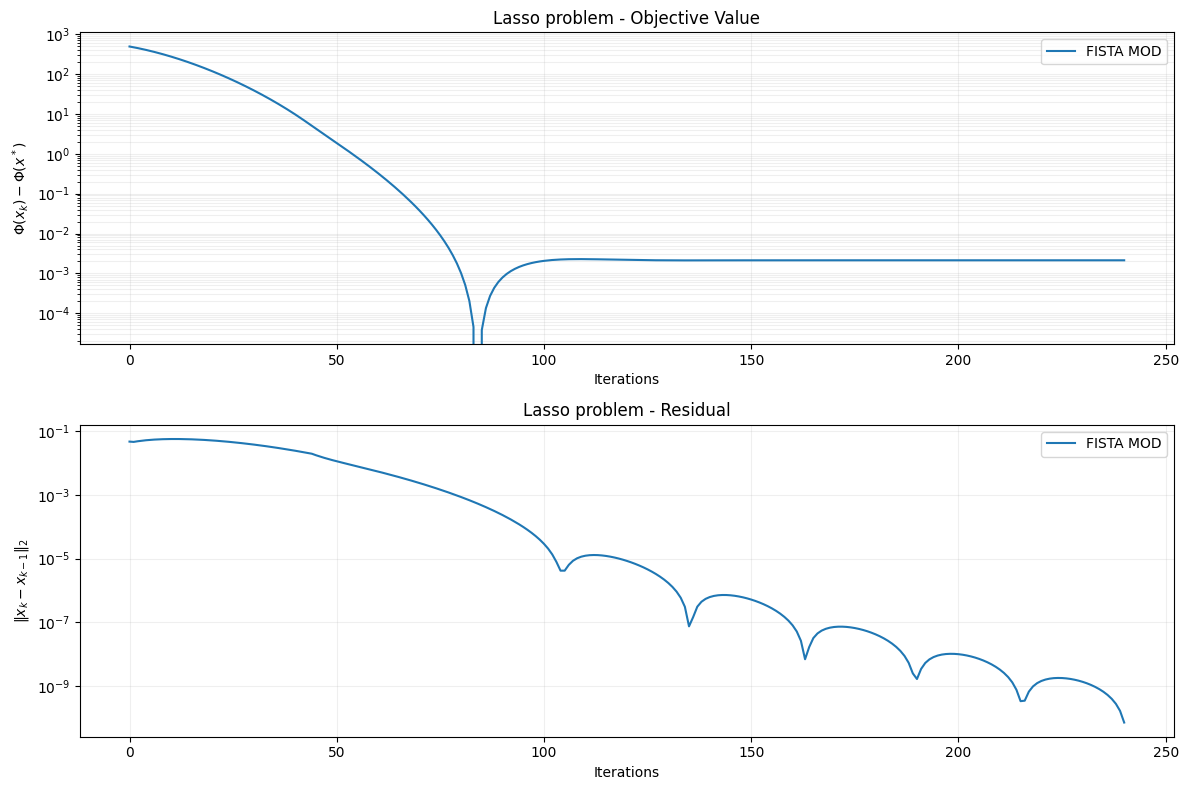

In [42]:
vis.plot_convergence([history], labels=["FISTA MOD"], title="Lasso problem")

# Greedy FISTA


In [43]:
fista_greedy = GreedyFISTA(params)

In [44]:
x, history = fista_greedy.optimize(*lasso)

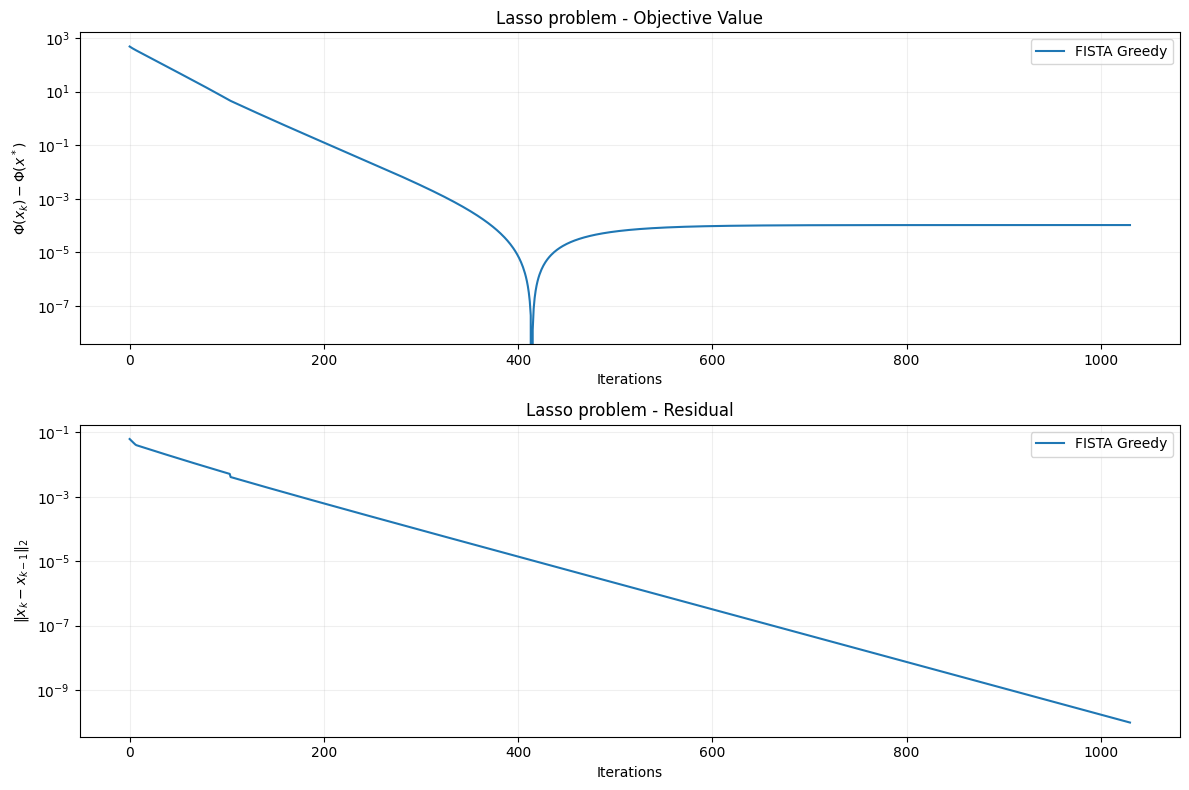

In [45]:
vis.plot_convergence([history], labels=["FISTA Greedy"], title="Lasso problem")

# FISTA Restarting


In [46]:
fista_restart = RestartingFISTA(params)

In [47]:
x, history = fista_restart.optimize(*lasso)

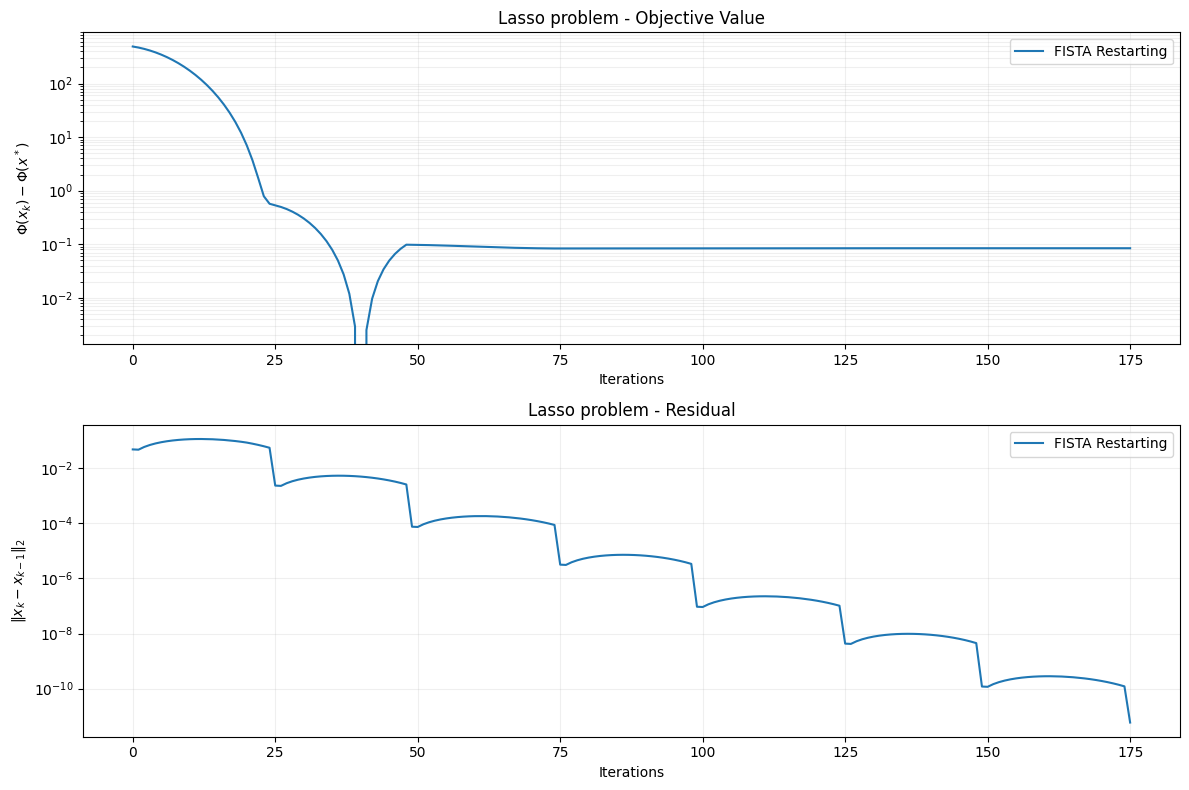

In [48]:
vis.plot_convergence([history], labels=["FISTA Restarting"], title="Lasso problem")

# FISTA CD


In [52]:
fista_cd = FistaCD(params)

In [53]:
x, history = fista_cd.optimize(*lasso)

 21%|██        | 1029/5000 [00:00<00:00, 39198.75it/s]


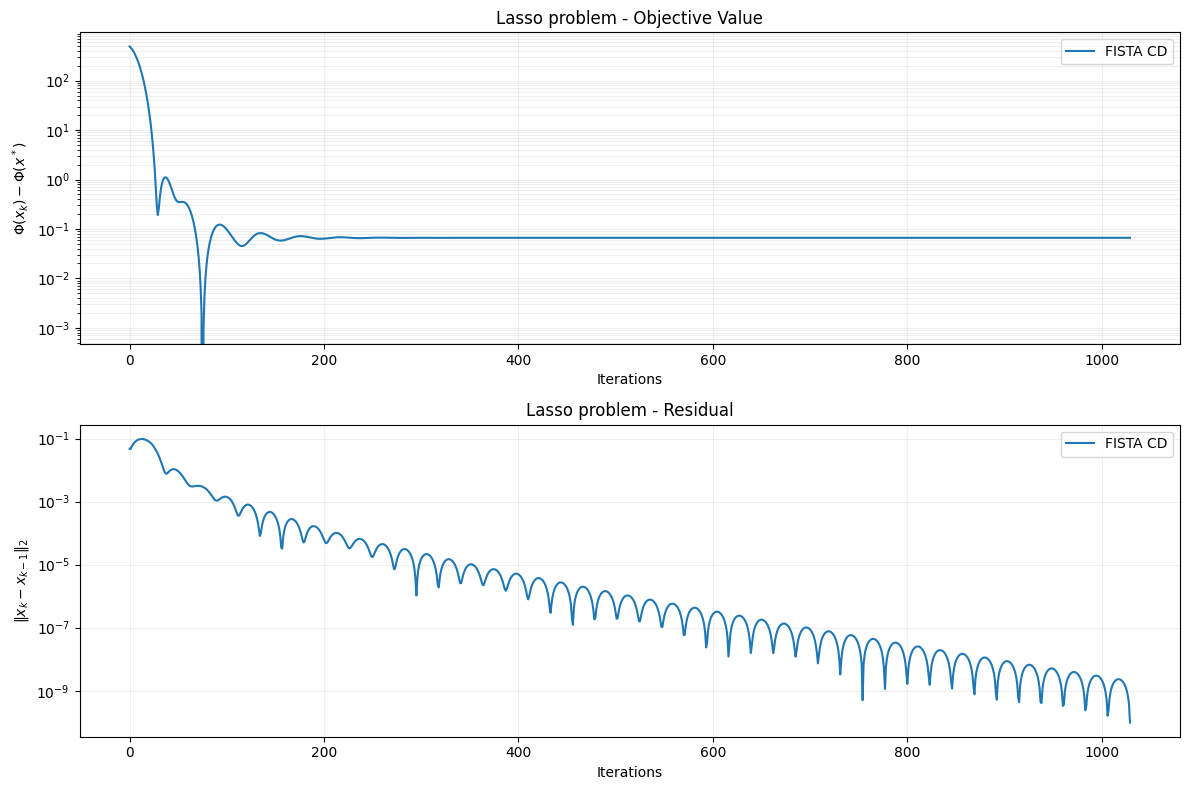

In [54]:
vis.plot_convergence([history], labels=["FISTA CD"], title="Lasso problem")